In [1]:
import pandas as pd

In [2]:
red_wine = pd.read_csv('winequality-red.csv', sep=';')
white_wine = pd.read_csv('winequality-white.csv', sep=';')

In [3]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
red_wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

`Biased towards classes 5 and 6`

In [5]:
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
white_wine.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [7]:
print(f'length of red-wine - {len(red_wine)} \nlength of white-wine - {len(white_wine)}')

length of red-wine - 1599 
length of white-wine - 4898


## Doing it on Red wine Dataset

In [8]:
from sklearn.preprocessing import StandardScaler

y = red_wine['quality']
X_ = red_wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

In [9]:
X_.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [10]:
# checking for correlation to remove features with high correlation
import numpy as np

corr = X_.corr()
corr.style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1,-0.256131,0.671703,0.114777,0.0937052,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.0616683
volatile acidity,-0.256131,1,-0.552496,0.00191788,0.0612978,-0.0105038,0.07647,0.0220262,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1,0.143577,0.203823,-0.0609781,0.035533,0.364947,-0.541904,0.31277,0.109903
residual sugar,0.114777,0.00191788,0.143577,1,0.0556095,0.187049,0.203028,0.355283,-0.0856524,0.00552712,0.0420754
chlorides,0.0937052,0.0612978,0.203823,0.0556095,1,0.00556215,0.0474005,0.200632,-0.265026,0.37126,-0.221141
free sulfur dioxide,-0.153794,-0.0105038,-0.0609781,0.187049,0.00556215,1,0.667666,-0.0219458,0.0703775,0.0516576,-0.0694084
total sulfur dioxide,-0.113181,0.07647,0.035533,0.203028,0.0474005,0.667666,1,0.0712695,-0.0664946,0.0429468,-0.205654
density,0.668047,0.0220262,0.364947,0.355283,0.200632,-0.0219458,0.0712695,1,-0.341699,0.148506,-0.49618
pH,-0.682978,0.234937,-0.541904,-0.0856524,-0.265026,0.0703775,-0.0664946,-0.341699,1,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.31277,0.00552712,0.37126,0.0516576,0.0429468,0.148506,-0.196648,1,0.0935948


`Moderately related and only 9 features, hence considering all`

# Question - 1

In [16]:
from sklearn.model_selection import train_test_split

X_tr_, X_te_, y_tr, y_te = train_test_split(X_, y, stratify=y.values, test_size=0.2, random_state=0)

In [17]:
red_scaler = StandardScaler()

In [23]:
X_tr = red_scaler.fit_transform(X_tr_)
X_te = red_scaler.transform(X_te_)

In [45]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=0, solver='newton-cg', penalty='none').fit(X_tr, y_tr)


C:\Users\00004891\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [46]:
print(f'train score - {lr_model.score(X_tr, y_tr)}')
print(f'test score - {lr_model.score(X_te, y_t)}')

train score - 0.599687255668491
test score - 0.609375


`Seems not able to fit the model at all`

In [47]:
lr_model.n_iter_

array([19, 12, 12, 11, 12, 13])

In [48]:
# Answer - 1
print('Probabilities for a non regularised logistic regression-')
print(lr_model.predict_proba(X_te))

Probabilities for a non regularised logistic regression-
[[1.76961192e-04 2.36392700e-02 1.09670232e-01 5.91379906e-01
  2.55070333e-01 2.00632968e-02]
 [1.09622634e-04 2.29114136e-02 2.24846963e-01 4.94687733e-01
  2.33308221e-01 2.41360473e-02]
 [2.35866774e-05 3.16381232e-02 6.13408060e-01 3.32470439e-01
  2.22328744e-02 2.26916862e-04]
 ...
 [1.73331590e-06 2.53909720e-02 7.73340980e-01 1.95803392e-01
  5.43364427e-03 2.92779306e-05]
 [2.73628803e-04 2.27746677e-02 5.44975290e-01 4.02854852e-01
  2.88182343e-02 3.03326980e-04]
 [7.78740144e-05 2.26061310e-02 5.86682160e-01 3.74915383e-01
  1.55370746e-02 1.81377631e-04]]


# Making the task as binary class classification

In [124]:
red_wine_modified = red_wine[feature_names]
status_ = [1 if val>5 else 0 for val in red_wine['quality'].values]
red_wine_modified['quality'] = status_

In [125]:
red_wine_modified.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [126]:
red_wine_modified.quality.value_counts()

1    855
0    744
Name: quality, dtype: int64

In [129]:
X_tr_, X_te_, y_tr, y_te = train_test_split(red_wine_modified[feature_names], red_wine_modified['quality'], stratify=red_wine_modified['quality'].values, test_size=0.2, random_state=0)
red_scaler = StandardScaler()
X_tr = red_scaler.fit_transform(X_tr_)
X_te = red_scaler.transform(X_te_)

In [132]:
lr_model = LogisticRegression(random_state=0, solver='newton-cg', penalty='none').fit(X_tr, y_tr)

In [135]:
print(f'train score - {lr_model.score(X_tr, y_tr)}')
print(f'test score - {lr_model.score(X_te, y_te)}')

train score - 0.7380766223612197
test score - 0.76875


# PCA analysis

In [136]:
from sklearn.decomposition import PCA

n_components = X_te.shape[-1]
pca = PCA()
pca_data = pca.fit_transform(X_tr)

In [137]:
pca.explained_variance_ratio_

array([0.28239169, 0.17455105, 0.13982222, 0.11532686, 0.08650919,
       0.05997523, 0.05203664, 0.03659334, 0.03170825, 0.01576526,
       0.00532026])

In [1]:
from matplotlib import pyplot as plt

plt.clf()
plt.plot(range(1,n_components+1), np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.xlabel('Principal Components')
plt.ylabel('Variance Preserved')
plt.show()

NameError: name 'pca_obj' is not defined

### From the above figure, It can be clearly explained that the 95% of variance is explained by 8 Principal components

In [84]:
feature_names = list(red_wine.columns)[:-1]

In [139]:
order = pca.components_[0].argsort()
print(f"In the first component the features are arranged as per their importance from high to low - \n\n{list(pd.Series(feature_names)[order])}")

In the first component the features are arranged as per their importance from high to low - 

['pH', 'volatile acidity', 'alcohol', 'free sulfur dioxide', 'total sulfur dioxide', 'residual sugar', 'chlorides', 'sulphates', 'density', 'citric acid', 'fixed acidity']


In [140]:
order = pca.components_[1].argsort()
print(f"In the second component the features are arranged as per their importance from high to low - \n\n{list(pd.Series(feature_names)[order])}")

In the second component the features are arranged as per their importance from high to low - 

['alcohol', 'citric acid', 'fixed acidity', 'sulphates', 'pH', 'chlorides', 'density', 'residual sugar', 'volatile acidity', 'free sulfur dioxide', 'total sulfur dioxide']


In [141]:
order = pca.components_[2].argsort()
print(f"In the third component the features are arranged as per their importance from high to low - \n\n{list(pd.Series(feature_names)[order])}")

In the third component the features are arranged as per their importance from high to low - 

['volatile acidity', 'density', 'fixed acidity', 'chlorides', 'pH', 'residual sugar', 'citric acid', 'sulphates', 'total sulfur dioxide', 'free sulfur dioxide', 'alcohol']


# NMF decomposition

In [142]:
from sklearn.decomposition import NMF

nmf = NMF(random_state=0)
w = nmf.fit_transform(red_wine_modified[feature_names])

In [144]:
red_wine_modified.shape

(1599, 12)

In [147]:
h = nmf.components_

In [151]:
# https://stackoverflow.com/questions/48148689/how-to-compare-predictive-power-of-pca-and-nmf
from sklearn import metrics
k = list(range(1, len(feature_names)+1))

def get_score(model, data, scorer=metrics.explained_variance_score):
    """ Estimate performance of the model on the data """
    prediction = model.inverse_transform(model.fit_transform(data))
    return scorer(data, prediction)

prefs = []
for val in k:
    prefs.append(get_score(NMF(n_components=val), red_wine[feature_names]))

In [154]:
cum_sum = np.cumsum(np.array([abs(val) for val in prefs]))

In [159]:
nmf_var_ratios = np.array([abs(val) for val in prefs])/abs(sum(prefs))

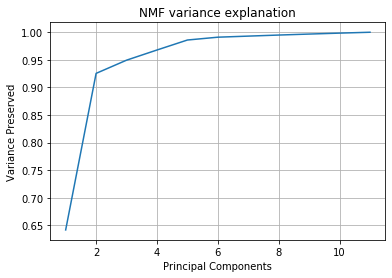

In [163]:
plt.clf()
plt.plot(range(1,n_components+1), np.cumsum(nmf_var_ratios))
plt.title('NMF variance explanation')
plt.grid()
plt.xlabel('Principal Components')
plt.ylabel('Variance Preserved')
plt.show()

### From the above plot, with four components of NMF the 95% of variance is preserved

# Comparision of PCA, NMF and normalised dataset

In [188]:
# normalised dataset
lr_model = LogisticRegression(random_state=0, solver='newton-cg', penalty='none').fit(X_tr, y_tr)
predictions_norm = lr_model.predict_proba(X_te)

In [191]:
# PCA dataset
pca_components = 8 #targeting to preserve 95% variance
pca = PCA(n_components=pca_components)
pca_data_train = pca.fit_transform(X_tr)
pca_data_test = pca.fit_transform(X_te)

# fitting on lr model
lr_model = LogisticRegression(random_state=0, solver='newton-cg', penalty='none').fit(pca_data_train, y_tr)
predictions_pca = lr_model.predict_proba(pca_data_test)

In [192]:
# NMF dataset
nmf_components = 4 #targeting to preserve 95% variance

# as the standardised data set have -ve values, need to scale it to get +ves
X_tr_, X_te_, y_tr, y_te = train_test_split(red_wine_modified[feature_names], red_wine_modified['quality'], stratify=red_wine_modified['quality'].values, test_size=0.2, random_state=0)
# red_scaler_nmf = StandardScaler(with_mean=False)
# X_tr_nmf = red_scaler_nmf.fit_transform(X_tr_)
# X_te_nmf = red_scaler_nmf.transform(X_te_)


nmf = NMF(n_components=nmf_components)
nmf_data_train = nmf.fit_transform(X_tr_)
nmf_data_test = nmf.fit_transform(X_te_)

# fitting on lr model
lr_model = LogisticRegression(random_state=0, solver='newton-cg', penalty='none').fit(nmf_data_train, y_tr)
predictions_nmf = lr_model.predict_proba(nmf_data_test)

In [203]:
fpr_norm, tpr_norm, _ = metrics.roc_curve(y_te,  predictions_norm[:,1])
auc_norm = metrics.roc_auc_score(y_te,  predictions_norm[:,1])

fpr_pca, tpr_pca, _ = metrics.roc_curve(y_te,  predictions_pca[:,1])
auc_pca = metrics.roc_auc_score(y_te,  predictions_pca[:,1])

fpr_nmf, tpr_nmf, _ = metrics.roc_curve(y_te,  predictions_nmf[:,1])
auc_nmf = metrics.roc_auc_score(y_te,  predictions_nmf[:,1])

Text(0.5, 1.0, 'Performance Comparision of PCA, NMF and standard datasets')

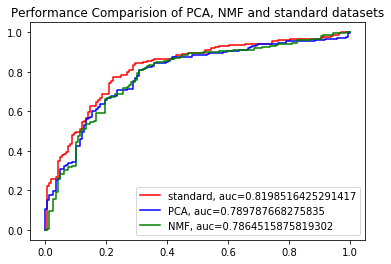

In [206]:
# plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
# plt.legend(loc=4)
# plt.show()

plt.plot(fpr_norm, tpr_norm, label="standard, auc="+str(auc_norm),color='r') # plotting t, a separately 
plt.plot(fpr_pca, tpr_pca, label="PCA, auc="+str(auc_pca),color='b') # plotting t, a separately 
plt.plot(fpr_nmf, tpr_nmf, label="NMF, auc="+str(auc_nmf),color='g') # plotting t, a separately 
plt.legend(loc=4)
plt.title('Performance Comparision of PCA, NMF and standard datasets')

### Conclusions from the above plot
1. The standard scaled dataset is performing better than dimensions reduced dataset.
2. PCA has slight edge in the performance than the NMF dataset.


# Question - 3

In [207]:
num_rounds = [50, 100, 150],
learning_rate = [0.05, 0.1, 0.3] 
max_depth = [3, 7, 10]

In [223]:
# XGboost using scikit-learn api
import xgboost as xgb
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import confusion_matrix

kf = KFold(n_splits=2, shuffle=True, random_state=10)
parameters = {'max_depth':max_depth, 'learning_rate': learning_rate}
grid_search_obj = GridSearchCV(xgb.XGBClassifier(), parameters, cv=5)
grid_search_obj.fit(X_tr, y_tr)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.05, 0.1, 0.3],
                         'max_depth': [3, 7, 10]},
             pre_dispatch='2*n_jobs', refit=True, return

In [227]:
# Results table for parameter tuning
pd.DataFrame(grid_search_obj.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.080607,0.002578,0.001400,0.000489,0.05,3,"{'learning_rate': 0.05, 'max_depth': 3}",0.773438,0.773438,0.746094,0.746094,0.784314,0.764660,0.015679,9
1,0.178611,0.009366,0.002198,0.000402,0.05,7,"{'learning_rate': 0.05, 'max_depth': 7}",0.777344,0.796875,0.792969,0.777344,0.788235,0.786552,0.008005,2
2,0.243401,0.002060,0.002794,0.000396,0.05,10,"{'learning_rate': 0.05, 'max_depth': 10}",0.777344,0.796875,0.789062,0.796875,0.784314,0.788898,0.007509,1
3,0.076413,0.000491,0.001187,0.000388,0.1,3,"{'learning_rate': 0.1, 'max_depth': 3}",0.777344,0.769531,0.761719,0.753906,0.784314,0.769351,0.010809,7
4,0.165608,0.002799,0.002002,0.000006,0.1,7,"{'learning_rate': 0.1, 'max_depth': 7}",0.781250,0.777344,0.773438,0.789062,0.772549,0.778733,0.006021,6
5,0.226199,0.001953,0.002809,0.000404,0.1,10,"{'learning_rate': 0.1, 'max_depth': 10}",0.792969,0.785156,0.777344,0.757812,0.803922,0.783425,0.015534,4
6,0.076191,0.000386,0.001211,0.000400,0.3,3,"{'learning_rate': 0.3, 'max_depth': 3}",0.789062,0.789062,0.773438,0.761719,0.788235,0.780297,0.011037,5
7,0.154789,0.000996,0.002008,0.000017,0.3,7,"{'learning_rate': 0.3, 'max_depth': 7}",0.765625,0.777344,0.761719,0.746094,0.788235,0.767787,0.014288,8
8,0.186188,0.001170,0.002611,0.000499,0.3,10,"{'learning_rate': 0.3, 'max_depth': 10}",0.773438,0.792969,0.785156,0.773438,0.796078,0.784206,0.009491,3


In [224]:
grid_search_obj.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [225]:
grid_search_obj.score(X_tr, y_tr)

0.9992181391712275

In [226]:
grid_search_obj.score(X_te, y_te)

0.8

### Overfitted a little. But still does very good job on comparing the scores 

In [228]:
from sklearn.decomposition import PCA

n_components = X_te.shape[-1]
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_tr)

In [231]:
df = pd.DataFrame(pca_data, columns=['comp1', 'comp2'])
df['quality'] = y_tr

C:\Users\00004891\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


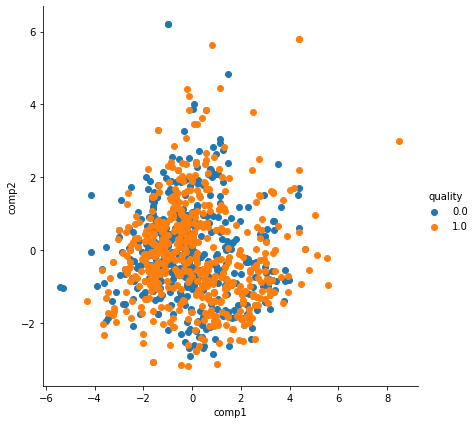

In [232]:
import seaborn as sn
sn.FacetGrid(df, hue='quality', size=6).map(plt.scatter, 'comp1', 'comp2').add_legend()

# Question - 2

In [245]:
import argparse
import numpy as np
import pandas as pd
from random import randrange
from sklearn.metrics import accuracy_score


class RandomForest(object):
    nest = 0           # number of trees
    maxFeat = 0        # maximum number of features
    maxDepth = 0       # maximum depth of the decision tree
    minLeafSample = 0  # minimum number of samples in a leaf
    criterion = None   # splitting criterion

    def __init__(self, nest, maxFeat, criterion, maxDepth, minLeafSample):
        """
        Decision tree constructor

        Parameters
        ----------
        nest: int
            Number of trees to have in the forest
        maxFeat: int
            Maximum number of features to consider in each tree
        criterion : String
            The function to measure the quality of a split.
            Supported criteria are "gini" for the Gini impurity
            and "entropy" for the information gain.
        maxDepth : int 
            Maximum depth of the decision tree
        minLeafSample : int 
            Minimum number of samples in the decision tree
        """
        self.nest = nest
        self.criterion = criterion
        self.maxFeat = maxFeat
        self.maxDepth = maxDepth
        self.minLeafSample = minLeafSample
        self.featsize = 4 if maxFeat>4 else maxFeat
        self.trees = [self.create_tree() for i in range(n_trees)]

    def train(self, xFeat, y):
        """
        Train the random forest using the data

        Parameters
        ----------
        xFeat : nd-array with shape n x d
            Training data 
        y : 1d array with shape n
            Array of responses associated with training data.

        Returns
        -------
        stats : object
            Keys represent the number of trees and
            the values are the out of bag errors
        """
        sample_ratio = 0.8
        total_sample_points = round(len(xFeat)*sample_ratio)
        trees_ = []
        oob_scores = []
        for tree in self.trees:
            X_sample, y_sample = [], []
            idxs_ = []
            for _ in range(total_sample_points):
                idx = randrange(len(xFeat))
                idxs_.append(idx)
                X_sample.append(xFeat[idx])
                y_sample.append(y[idx])
            X, y = np.array(X_sample), np.array(y_sample)
            tree.fit(X,y)
            leftover_idxs = set(range(len(xFeat))).difference(set(idxs_))
            X_c, y_c = xFeat[leftover_idxs], y[leftover_idxs]
            preds = tree.predict(X_c, y_c)
    

    def create_tree(self):
        return DecisionTree(self.n_features, depth = self.maxDepth, min_leaf=self.minLeafSample)
    
    def predict(self, xFeat):
        """
        Given the feature set xFeat, predict 
        what class the values will have.

        Parameters
        ----------
        xFeat : nd-array with shape m x d
            The data to predict.  

        Returns
        -------
        yHat : 1d array or list with shape m
            Predicted response per sample
        """
        yHat = np.mean([t.predict(x) for t in self.trees], axis=0)
        return yHat


def file_to_numpy(filename):
    """
    Read an input file and convert it to numpy
    """
    df = pd.read_csv(filename)
    return df.to_numpy()


def main():
    """
    Main file to run from the command line.
    """
    # set up the program to take in arguments from the command line
    parser = argparse.ArgumentParser()
    parser.add_argument("xTrain",
                        help="filename for features of the training data")
    parser.add_argument("yTrain",
                        help="filename for labels associated with training data")
    parser.add_argument("xTest",
                        help="filename for features of the test data")
    parser.add_argument("yTest",
                        help="filename for labels associated with the test data")
    parser.add_argument("epoch", type=int, help="max number of epochs")
    parser.add_argument("--seed", default=334, 
                        type=int, help="default seed number")
    
    args = parser.parse_args()
    # load the train and test data assumes you'll use numpy
    xTrain = file_to_numpy(args.xTrain)
    yTrain = file_to_numpy(args.yTrain)
    xTest = file_to_numpy(args.xTest)
    yTest = file_to_numpy(args.yTest)

    np.random.seed(args.seed)   
    model = RandomForest(args.epoch)
    trainStats = model.train(xTrain, yTrain)
    print(trainStats)
    yHat = model.predict(xTest)


if __name__ == "__main__":
    pass

In [235]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_tr, y_tr)

In [238]:
preds = [clf.predict(X_te) for _ in range(5)]

In [242]:
np.mean(preds, axis=1)

array([0.5375, 0.5375, 0.5375, 0.5375, 0.5375])

In [243]:
preds

[array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
        0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
        0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
        1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
        1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
        1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 